<a href="https://colab.research.google.com/github/JLMendozaCarmona/DataScienceEcosystem/blob/main/Coursera_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings

%matplotlib inline

In [6]:
!pip install nbformat

In [7]:
pip install --upgrade pandas-datareader

In [8]:
!pip install yfinance
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

/bin/bash: line 1: mamba: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.24.0 requires nbformat>=5.2.0, but you have nbformat 4.2.0 which is incompatible.
nbclient 0.9.0 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.
nbconvert 6.5.4 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.


In [9]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
from pandas_datareader import data as pdr
yf.pdr_override()
ticker = yf.Ticker ("TSLA")

In [13]:
from datetime import datetime
inicio = datetime (2019, 2, 2)
fin = datetime ( 2024, 2, 2)

In [14]:
tesla_data = ticker.history (period="max")

In [15]:
print (tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [16]:
tesla_data.reset_index(inplace=True)

In [17]:
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [18]:
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3423,2024-02-05 00:00:00-05:00,184.259995,184.679993,175.009995,181.059998,134294400,0.0,0.0
3424,2024-02-06 00:00:00-05:00,177.210007,186.490005,177.110001,185.100006,122676000,0.0,0.0
3425,2024-02-07 00:00:00-05:00,188.179993,189.789993,182.679993,187.580002,111535200,0.0,0.0
3426,2024-02-08 00:00:00-05:00,189.000000,191.619995,185.580002,189.559998,83034000,0.0,0.0


In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import requests

In [20]:
pip install html5lib

In [21]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
result = requests.get(url)
html_data = result.text

In [22]:
soup = BeautifulSoup(html_data, "html.parser")


In [23]:
table= soup.find_all("tbody")[1]
data = []
for row in table.find_all("tr"):
    row_data = [cell.get_text(strip=True) for cell in row.find_all(["th", "td"])]
    data.append(row_data)

In [24]:
tesla_revenue = pd.DataFrame(data[1:], columns=data[0])
tesla_revenue.columns = ["Date", "Revenue"]
print(tesla_revenue)

          Date  Revenue
0   2022-06-30  $16,934
1   2022-03-31  $18,756
2   2021-12-31  $17,719
3   2021-09-30  $13,757
4   2021-06-30  $11,958
5   2021-03-31  $10,389
6   2020-12-31  $10,744
7   2020-09-30   $8,771
8   2020-06-30   $6,036
9   2020-03-31   $5,985
10  2019-12-31   $7,384
11  2019-09-30   $6,303
12  2019-06-30   $6,350
13  2019-03-31   $4,541
14  2018-12-31   $7,226
15  2018-09-30   $6,824
16  2018-06-30   $4,002
17  2018-03-31   $3,409
18  2017-12-31   $3,288
19  2017-09-30   $2,985
20  2017-06-30   $2,790
21  2017-03-31   $2,696
22  2016-12-31   $2,285
23  2016-09-30   $2,298
24  2016-06-30   $1,270
25  2016-03-31   $1,147
26  2015-12-31   $1,214
27  2015-09-30     $937
28  2015-06-30     $955
29  2015-03-31     $940
30  2014-12-31     $957
31  2014-09-30     $852
32  2014-06-30     $769
33  2014-03-31     $621
34  2013-12-31     $615
35  2013-09-30     $431
36  2013-06-30     $405
37  2013-03-31     $562
38  2012-12-31     $306
39  2012-09-30      $50
40  2012-06-30  

In [25]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [26]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [49]:
tesla_revenue.head(5)

,Date,Revenue
0,2022-06-30,16934
1,2022-03-31,18756
2,2021-12-31,17719
3,2021-09-30,13757
4,2021-06-30,11958


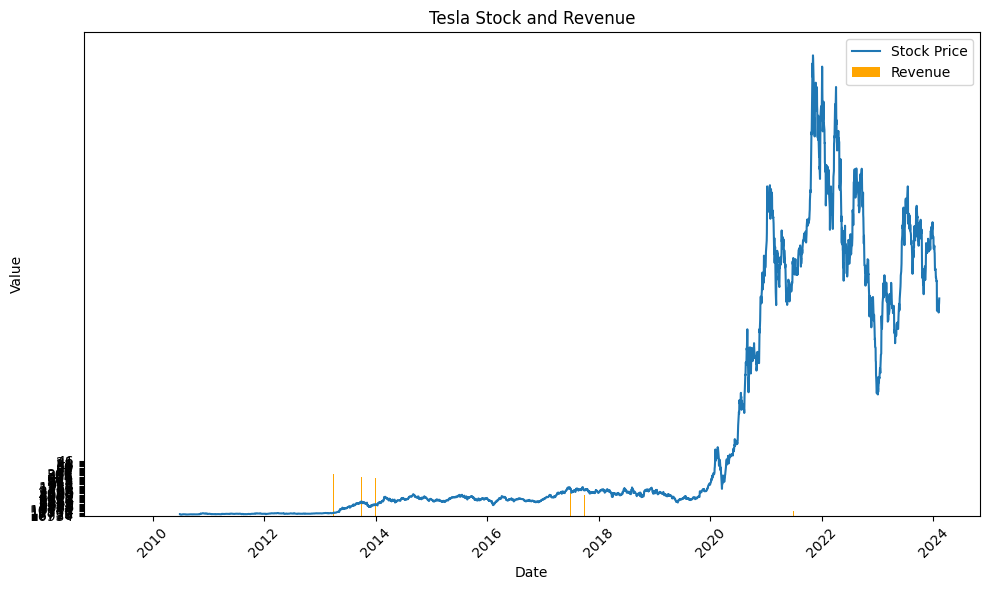

In [50]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(10, 6))


    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')


    plt.bar(revenue_data['Date'], revenue_data['Revenue'], color='orange', label='Revenue')

    plt.title(f'{stock_name} Stock and Revenue')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


make_graph(tesla_data, tesla_revenue, 'Tesla')


In [28]:
from pandas_datareader import data as pdr
yf.pdr_override()
ticker2 = yf.Ticker ("GME")

In [29]:
gme_data = ticker2.history (period="max")

In [30]:
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [31]:
gme_data.reset_index(inplace=True)

In [32]:
print( gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [41]:
import pandas as pd
from bs4 import BeautifulSoup
import requests


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text





In [42]:

soup = BeautifulSoup(html_data, "html.parser")


table = soup.find_all("tbody")[1]


data = []
for row in table.find_all("tr"):
    row_data = [cell.get_text(strip=True) for cell in row.find_all(["th", "td"])]
    data.append(row_data)



In [44]:

gme_revenue = pd.DataFrame(data[1:], columns=data[0])



In [45]:
gme_revenue = pd.DataFrame(data[1:], columns=data[0])
gme_revenue.columns = ["Date", "Revenue"]
print(gme_revenue)

          Date Revenue
0   2020-01-31  $2,194
1   2019-10-31  $1,439
2   2019-07-31  $1,286
3   2019-04-30  $1,548
4   2019-01-31  $3,063
..         ...     ...
56  2006-01-31  $1,667
57  2005-10-31    $534
58  2005-07-31    $416
59  2005-04-30    $475
60  2005-01-31    $709

[61 rows x 2 columns]


In [46]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")

In [48]:
gme_revenue.head()

,Date,Revenue
0,2020-01-31,2194
1,2019-10-31,1439
2,2019-07-31,1286
3,2019-04-30,1548
4,2019-01-31,3063


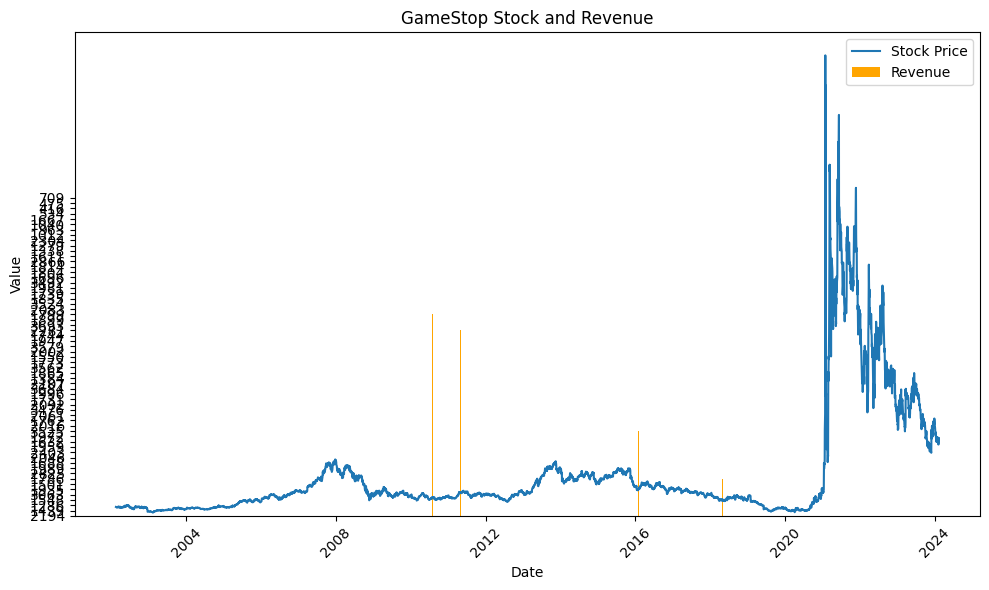

In [51]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(10, 6))


    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')


    plt.bar(revenue_data['Date'], revenue_data['Revenue'], color='orange', label='Revenue')

    plt.title(f'{stock_name} Stock and Revenue')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


make_graph(gme_data, gme_revenue, 'GameStop')
